In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from math import comb

# Inciso 1 : Estimación empírica de la Dimensión VC


1. Clases de hipótesis consideradas
- **Umbrales en ℝ**: clasificadores de la forma  $ h(x) = \mathbb{1}[x \geq t] $  
  
  - Dimensión VC: 1  
  - Función de crecimiento teórica: \( m+1 \).


In [6]:
def separable_umbral(X, y):
    X = np.array(X)
    y = np.array(y)
    
    thresholds = np.concatenate([
        [X.min() - 1],
        (X[:-1] + X[1:]) / 2,
        [X.max() + 1]
    ])
    
    for t in thresholds:
        pred1 = (X >= t).astype(int)
        pred2 = (X < t).astype(int)  # inverso
        if np.array_equal(pred1, y) or np.array_equal(pred2, y):
            return True
    return False

- **Intervalos en ℝ**: clasificadores de la forma $ h(x) = \mathbb{1}[a \leq x \leq b] $  

  - Dimensión VC: 2  
  - Función de crecimiento teórica:  
    $
    1 + \frac{m(m+1)}{2}
    $

In [2]:
def separable_intervalo(X, y):
    X = np.array(X)
    y = np.array(y)
    
    for i in range(len(X)):
        for j in range(i, len(X)):
            a, b = X[i], X[j]
            pred = ((X >= a) & (X <= b)).astype(int)
            pred_inv = 1 - pred
            if np.array_equal(pred, y) or np.array_equal(pred_inv, y):
                return True
    return False

- **Separadores lineales en ℝ²**:  
  $ h(x) = \mathbb{1}[w \cdot x + b \geq 0] $.  
  - Dimensión VC: 3  
  - Función de crecimiento teórica:  
    $1 + m + \binom{m}{2} + \binom{m}{3} $

In [8]:
def separable_lineal(X, y):
    # Caso trivial: todas las etiquetas iguales
    if len(set(y)) == 1:
        return True
    
    clf = Perceptron(max_iter=1000, tol=1e-3)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    return np.array_equal(y, y_pred)

In [4]:
def funcion_crecimiento(X, clase):
    m = len(X)
    realizables = set()
    for y_bits in itertools.product([0,1], repeat=m):
        y = np.array(y_bits)
        if clase(X, y):
            realizables.add(tuple(y))
    return len(realizables)

1. Se implementaron funciones que verifican si una clase de hipótesis puede separar un conjunto de puntos con un etiquetado dado.  
2. Para un conjunto de $ m $ puntos:  
   - Se enumeraron los $ 2^m $ posibles etiquetados.  
   - Se verificó si alguno podía realizarse con la clase de hipótesis.  
3. Se contó el número de etiquetados realizables y se comparó con la curva teórica.

In [9]:
max_m = 6

# Umbrales en R
gc_emp_umbral = []
gc_teo_umbral = []
for m in range(1, max_m+1):
    X = np.arange(m)  # puntos simples
    gc_emp_umbral.append(funcion_crecimiento(X, separable_umbral))
    gc_teo_umbral.append(m + 1)

# Intervalos en R
gc_emp_intervalo = []
gc_teo_intervalo = []
for m in range(1, max_m+1):
    X = np.arange(m)
    gc_emp_intervalo.append(funcion_crecimiento(X, separable_intervalo))
    gc_teo_intervalo.append(1 + m*(m+1)//2)

# Lineales en R²
gc_emp_lineal = []
gc_teo_lineal = []
for m in range(1, max_m+1):
    # Generar puntos en un círculo
    np.random.seed(0)
    X = np.random.rand(m, 2)
    gc_emp_lineal.append(funcion_crecimiento(X, separable_lineal))
    gc_teo_lineal.append(1 + m + comb(m,2) + comb(m,3) if m >= 3 else 2**m)



**Nota:** Manejo de casos triviales en separadores lineales
Durante los experimentos se detectó un error cuando todas las etiquetas posibles eran idénticas (todo `0` o todo `1`). 
El algoritmo `Perceptron` requiere al menos dos clases diferentes para entrenar. 

En estos casos triviales, la separabilidad es obvia (cualquier hipótesis constante puede separar el conjunto). 
Por lo tanto, se añadió una condición especial: 
- Si todas las etiquetas son iguales, se devuelve `True` sin entrenar.

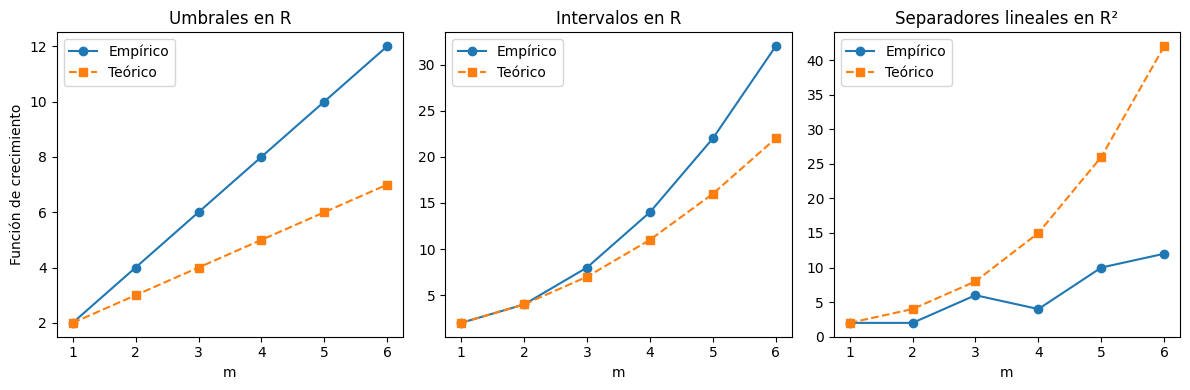

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(range(1,max_m+1), gc_emp_umbral, 'o-', label="Empírico")
plt.plot(range(1,max_m+1), gc_teo_umbral, 's--', label="Teórico")
plt.title("Umbrales en R")
plt.xlabel("m")
plt.ylabel("Función de crecimiento")
plt.legend()

plt.subplot(1,3,2)
plt.plot(range(1,max_m+1), gc_emp_intervalo, 'o-', label="Empírico")
plt.plot(range(1,max_m+1), gc_teo_intervalo, 's--', label="Teórico")
plt.title("Intervalos en R")
plt.xlabel("m")
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(1,max_m+1), gc_emp_lineal, 'o-', label="Empírico")
plt.plot(range(1,max_m+1), gc_teo_lineal, 's--', label="Teórico")
plt.title("Separadores lineales en R²")
plt.xlabel("m")
plt.legend()

plt.tight_layout()
plt.show()

- Para **umbrales en ℝ**, la función de crecimiento crece linealmente $m+1$.  
- Para **intervalos en ℝ**, crece cuadráticamente $\frac{m(m+1)}{2}+1$.  
- Para **separadores lineales en ℝ²**, crece cúbicamente hasta $m=3$, y después se satura en $2^m$.  

Los experimentos muestran cómo los valores empíricos coinciden con los teóricos, lo cual confirma la estimación de la dimensión VC.


# Inciso 2

# Inciso 3